<a href="https://colab.research.google.com/github/pingkivila/DigitalSkola_DataScience11/blob/main/Introduction_Visualization_HW1WEEK9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid19**

Deskripsi:

Dataset 1 - COVID-19
Number of Confirmed, Death and Recovered cases every day across the globe

Data ini memiliki informasi mengenai sebaran virus corona dari tingkat harian yang terkena gejala, yang statusnya positif, yang meninggal dan yang sembuh dari virus corona. 


*   Date: periode waktu data covid-19 perhari 
*   Country/region: nama negara di dunia
*   Confirmed: total yang terkonfirmasi gejala covid-19
*   Deaths: total yang meninggal
*   Recovered: total yang sembuh dari covid-19
*   Active: total yang terkonfirmasi positif dari covid-19
*   New cases: total kasus baru covid-19
*   New deaths: total kasus baru yang meninggal
*   New recovered: total kasus baru yang sembuh
*   WHO Region: nama negara berdasarkan wilayah WHO di dunia




Dataset 2 - World Vaccine Progress

Data ini berisi informasi mengenai negara-negara yang telah melakukan vaksin beserta jenis vaksin yang terdistribusi
*   Country: Nama-nama negara di dunia
*   Doses Administered: Total Dosis yang Diberikan
*   Doses per 1000: Jumlah Dosis per seribu
*   Fully Vaccinated Population (%): Persentase orang yang divaksinasi lengkap di suatu negara.
*   Vaccine being used in a country : Jenis vaksin yang digunakan di suatu negara.




# **Dataset 1**

In [ ]:
import pandas as pd

In [ ]:
dc = pd.read_csv("/content/full_grouped.csv.zip")
dc.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [ ]:
dc.shape

(35156, 10)

In [ ]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB



*   Merubah kolom country/region menjadi country





In [ ]:
dc.rename(columns={'Country/Region':'Country'}, inplace = True)
dc.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
dc.isnull().sum()

Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
WHO Region       0
dtype: int64



*   Melihat sebaran kasus covid-19 berdasarkan wilayah WHO



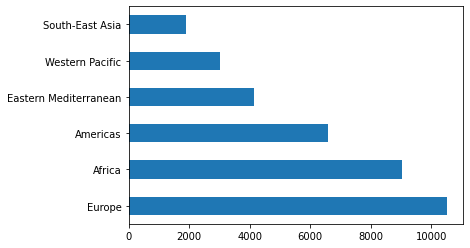

In [ ]:
dc['WHO Region'].value_counts().plot(kind='barh')

Berdasarkan grafik di atas dapat dilihat bahwa kasus covid-19 tertinggi yaitu di Europa bahkan kasus tersebut lebih dari 10000 kasus terdeteksi (kasus status terjangkit covid-19, kasus meninggal, kasus sembuh dari covid-19) 

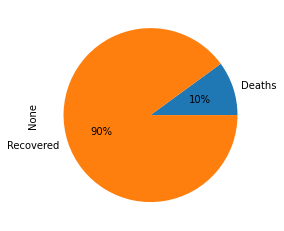

In [ ]:
dc[['Deaths', 'Recovered']].sum().plot(kind='pie', autopct='%1.0f%%')

Secara keseluruhan dari jumlah semua negara berdasarkan diagram di atas dapat dilihat bahwa jumlah kasus yang meninggal lebih kecil dari kasus yang sembuh dari covid-19



*   Melihat jumlah total keseluruhan data per hari dari kasus yang terdeteksi covid-19, yang berstatus positif, yang meninggal, dan yang sembuh dari covid-19 



In [ ]:
dc_1 = pd.pivot_table(dc, values=['Confirmed', 'Deaths', 'Recovered', 'Active'], index = 'Date',aggfunc=['sum'])
dc_1.head()


sum                           
           Active Confirmed Deaths Recovered
Date                                        
2020-01-22    510       555     17        28
2020-01-23    606       654     18        30
2020-01-24    879       941     26        36
2020-01-25   1353      1434     42        39
2020-01-26   2010      2118     56        52

In [ ]:
dc_1.tail()

sum                            
             Active Confirmed  Deaths Recovered
Date                                           
2020-07-23  6166006  15510481  633506   8710969
2020-07-24  6212290  15791645  639650   8939705
2020-07-25  6243930  16047190  644517   9158743
2020-07-26  6309711  16251796  648621   9293464
2020-07-27  6358362  16480485  654036   9468087

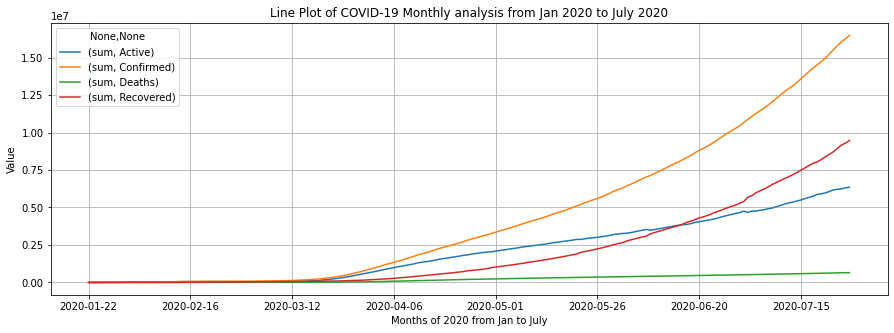

In [ ]:
dc_1.plot(figsize = (15,5), grid = True, xlabel = 'Months of 2020 from Jan to July', ylabel = 'Value', 
          title = 'Line Plot of COVID-19 Monthly analysis from Jan 2020 to July 2020')

Dapat dilihat di atas data kasus covid-19 dari bulan januari sampai dengan juli 2020 bahwa setiap bulan kasus orang yang terkonfirmasi covid-19 terus meningkat bahkan peningkatannya lebih besar dari kasus yang lain. Pada bulan april sampai mei kasus positif lebih tinggi dari pada kasus orang yang sembuh namun pada bulan juni hingga juli kasus orang yang sembuh mengalami peningkatan sehingga pada bulan tersebut kasus sembuh lebih tinggi dari pada kasus positif. Sedangkan untuk kasus meninggal dari bulan januari sampai juli masih lebih kecil dari kasus yang lainnya namun kasus meninggal ini terus meningkat dari bulan april sampai bulan juli.

**Kasus baru Covid-19**



*   Melihat jumlah total keseluruhan data per hari dari kasus baru yang terdeteksi covid-19, yang berstatus positif, yang meninggal, dan yang sembuh dari covid-19 



In [ ]:
dc_2 = pd.pivot_table(dc, values=['New cases', 'New deaths', 'New recovered'], index = 'Date',aggfunc=['sum'])
dc_2.head()


sum                         
           New cases New deaths New recovered
Date                                         
2020-01-22         0          0             0
2020-01-23        99          1             2
2020-01-24       287          8             6
2020-01-25       493         16             3
2020-01-26       684         14            13

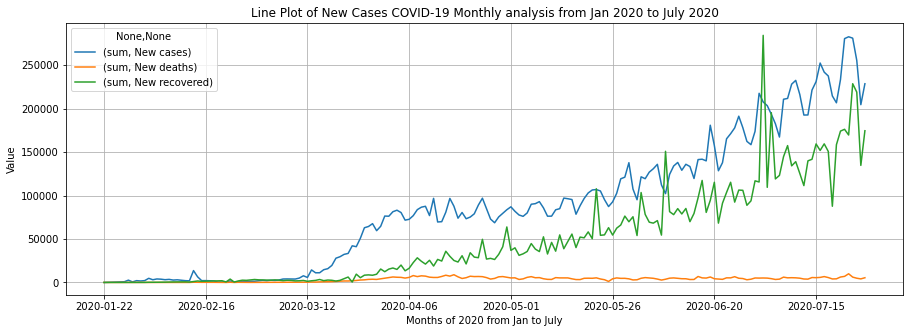

In [ ]:
dc_2.plot(figsize = (15,5), grid = True, xlabel = 'Months of 2020 from Jan to July', ylabel = 'Value', 
          title = 'Line Plot of New Cases COVID-19 Monthly analysis from Jan 2020 to July 2020')

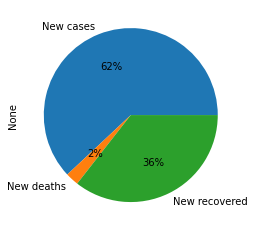

In [ ]:
dc[['New cases', 'New deaths', 'New recovered']].sum().plot(kind='pie', autopct='%1.0f%%')

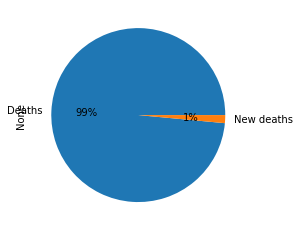

In [ ]:
dc[[ 'Deaths', 'New deaths']].sum().plot(kind='pie', autopct='%1.0f%%')

Dari diagram di atas dapat dilihat bahwa perbandingan antara kasus meninggal dengan kasus meninggal yang baru. Pertambahan kasus meninggal tidak cukup besar

# **Dataset 2**

In [ ]:
dv = pd.read_csv("/content/World_Vaccination_Progress.csv")
dv.head()

,Country,Doses Administered,Doses per 1000,Fully Vaccinated Population (%),Vaccine being used in a country
0,World,10838412917,1427.2,57.89,NaN
1,China,3152419000,2263.5,88.20,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
2,India,1784081444,1319.0,59.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
3,United States,554532208,1694.9,65.77,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
4,Brazil,394812859,1884.8,74.27,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [ ]:
dv.shape

(218, 5)

In [ ]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          218 non-null    object 
 1   Doses Administered               218 non-null    int64  
 2   Doses per 1000                   217 non-null    float64
 3   Fully Vaccinated Population (%)  218 non-null    float64
 4   Vaccine being used in a country  212 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ KB


In [ ]:
dv.isna().sum()

Country                            0
Doses Administered                 0
Doses per 1000                     1
Fully Vaccinated Population (%)    0
Vaccine being used in a country    6
dtype: int64



*   Menggabungkan data 1 dengan data 2



In [ ]:
join = dc.merge(dv, how = 'inner', on = 'Country')
join.tail()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Doses Administered,Doses per 1000,Fully Vaccinated Population (%),Vaccine being used in a country
33459,2020-07-23,Zimbabwe,2124,28,510,1586,90,2,0,Africa,7921113,548.6,23.59,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
33460,2020-07-24,Zimbabwe,2296,32,514,1750,172,4,4,Africa,7921113,548.6,23.59,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
33461,2020-07-25,Zimbabwe,2434,34,518,1882,138,2,4,Africa,7921113,548.6,23.59,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
33462,2020-07-26,Zimbabwe,2512,34,518,1960,78,0,0,Africa,7921113,548.6,23.59,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
33463,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,7921113,548.6,23.59,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."




*   Melihat jumlah total pemberian dosis per 1000 berdasarkan tiap wilayah WHO



In [ ]:
pd.pivot_table(join, values ='Doses per 1000', index = ['WHO Region'], aggfunc= [sum])

,sum
,Doses per 1000
WHO Region,
Africa,2949062.0
Americas,8322741.2
Eastern Mediterranean,3913144.8
Europe,15025354.8
South-East Asia,2189072.0
Western Pacific,5085324.8


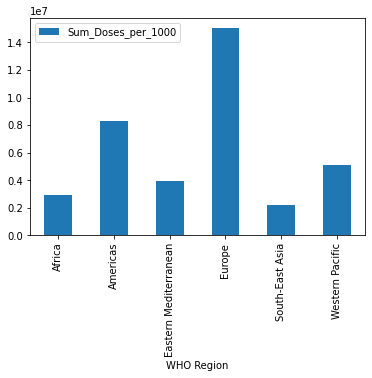

In [ ]:
join.groupby('WHO Region').agg(Sum_Doses_per_1000= ('Doses per 1000', 'sum')).plot.bar()




*   Melihat jumlah total pemberian dosis berdasarkan tiap wilayah WHO



In [ ]:
pd.pivot_table(join, values = 'Doses Administered', index = ['WHO Region'], aggfunc = sum)

,Doses Administered
WHO Region,
Africa,43245618380
Americas,208863061428
Eastern Mediterranean,115809070848
Europe,279403320688
South-East Asia,478761537336
Western Pacific,758996977984


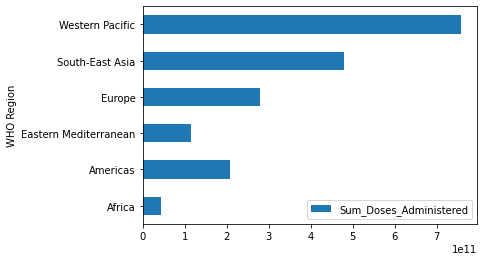

In [ ]:
join.groupby('WHO Region').agg(Sum_Doses_Administered= ('Doses Administered', 'sum')).plot.barh()




*   Melihat jumlah total populasi yang divaksinasi sepenuhnya berdasarkan tiap wilayah WHO



In [ ]:
pd.pivot_table(join, values = 'Fully Vaccinated Population (%)', index = ['WHO Region'], aggfunc = sum)

,Fully Vaccinated Population (%)
WHO Region,
Africa,133927.44
Americas,340836.48
Eastern Mediterranean,160098.92
Europe,588535.88
South-East Asia,93819.52
Western Pacific,205442.64


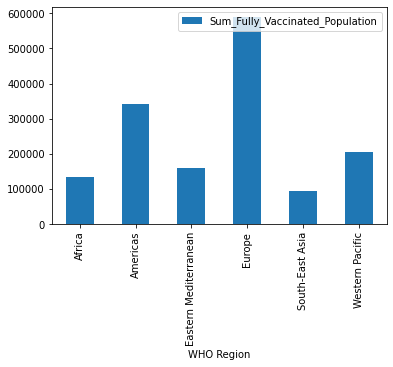

In [ ]:
join.groupby('WHO Region').agg(Sum_Fully_Vaccinated_Population= ('Fully Vaccinated Population (%)', 'sum')).sort_index().plot.bar()



*   Melihat jumlah total kasus yang terkonfirmasi covid-19, yang meninggal, yang sembuh berdasarkan wilayah WHO



In [ ]:
join[['Confirmed', 'Deaths','Recovered','Doses Administered' ]].sum()

Confirmed                 603234090
Deaths                     32356142
Recovered                 331732181
Doses Administered    1885079586664
dtype: int64

In [ ]:
pd.pivot_table(join, values =[ 'Confirmed', 'Deaths','Recovered'], index = ['WHO Region'], aggfunc = sum)

,Confirmed,Deaths,Recovered
WHO Region,,,
Africa,21178981,425477,10990624
Americas,177915246,8347881,100716028
Eastern Mediterranean,73849431,1922659,47989579
Europe,248878437,19271040,123201333
South-East Asia,55093177,1457495,30014851
Western Pacific,26318818,931590,18819766


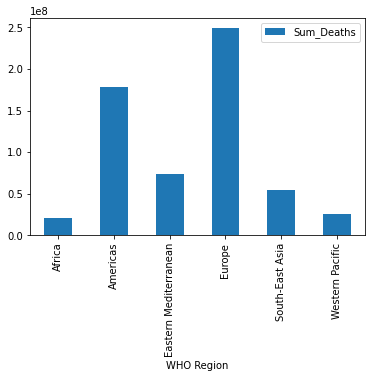

In [ ]:
join.groupby('WHO Region').agg(Sum_Deaths= ('Confirmed', 'sum')).plot.bar()

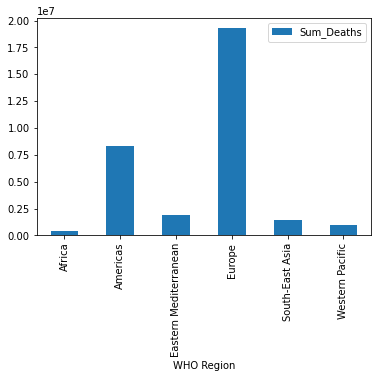

In [ ]:
join.groupby('WHO Region').agg(Sum_Deaths= ('Deaths', 'sum')).plot.bar()

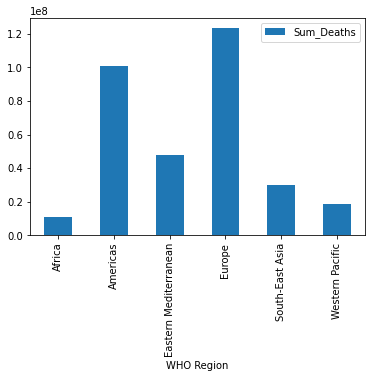

In [ ]:
join.groupby('WHO Region').agg(Sum_Deaths= ('Recovered', 'sum')).plot.bar()

**Kesimpulan**



*   Kasus covid-19 dari bulan januari 2020 sampai juli 2020 terus meningkat


*   Europe merupakan wilayah tertinggi yang terjangkit kasus covid-19
*   Secara keseluruhan populasi tertinggi yang telah mendapatkan vaksin covid-19 yaitu wilayah europe



